This learning project is a demonstration of my understanding of and ability to construct machine learning algorithms from scratch. 

I implemented the following models:
- Classification:
    - KNN
    - Desicion tree
    - Random forest
    - Support vector machine
    - Boosting machines:
        - Adaptive boosting
        - Gradient boosting
- Clusterization:
    - K-means

Each model is tested against its corresponding counterpart from the scikit-learn module with graphical demonstration of the decision rule of each model. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from utils.plot import compare_classifiers
from utils.time import timed

%matplotlib inline

# Supervised classification

## Synthetic data generation

Let us generate a dataset of 2 classes of points in 2-dimensional space that are not easily linearly divisible. 

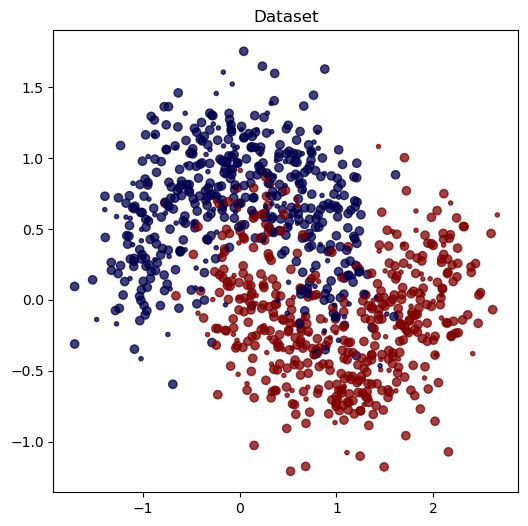

In [2]:
X, y = make_moons(n_samples=1000, noise=0.3)
# convert labels from {0, 1} to {-1, 1}
y[y == 0] = -1
# generate data samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30),
                     np.linspace(y_min, y_max, 30))

cmap = 'seismic'
plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], 
            c=y_train, cmap=cmap, alpha=0.75)
plt.scatter(X_test[:, 0], X_test[:, 1], 
            marker='.', c=y_test, cmap=cmap, alpha=0.75)
plt.title('Dataset')
plt.show()

## K-nearest neighbors

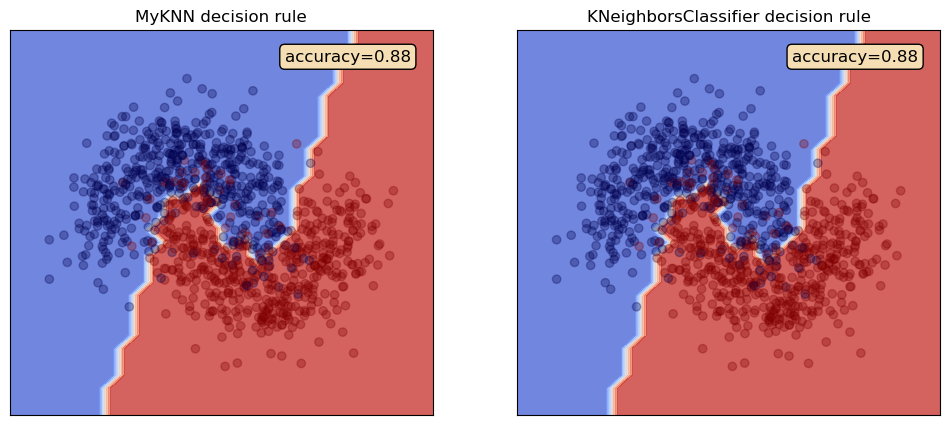

In [3]:
from my_models.KNN import MyKNN
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 7
my_knn = MyKNN(n_neighbors=n_neighbors)
my_knn.fit(X_train, y_train)

knn_sklearn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_sklearn.fit(X_train, y_train)

compare_classifiers([my_knn, knn_sklearn], X_test, y_test, xx, yy, X, y)

# Desicion tree

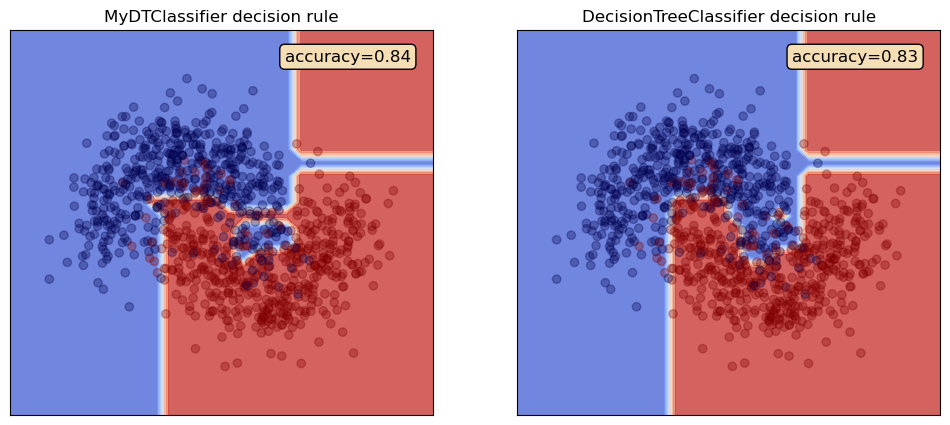

In [4]:
from my_models.desicion_tree import MyDTClassifier
from sklearn.tree import DecisionTreeClassifier

data = np.hstack((X_train, y_train.reshape(y_train.shape[0], 1)))

my_dt = MyDTClassifier()
my_dt.fit(data)

dt_sklearn = DecisionTreeClassifier()
dt_sklearn.fit(X_train, y_train)

compare_classifiers([my_dt, dt_sklearn], X_test, y_test, xx, yy, X, y) 

## Random forest

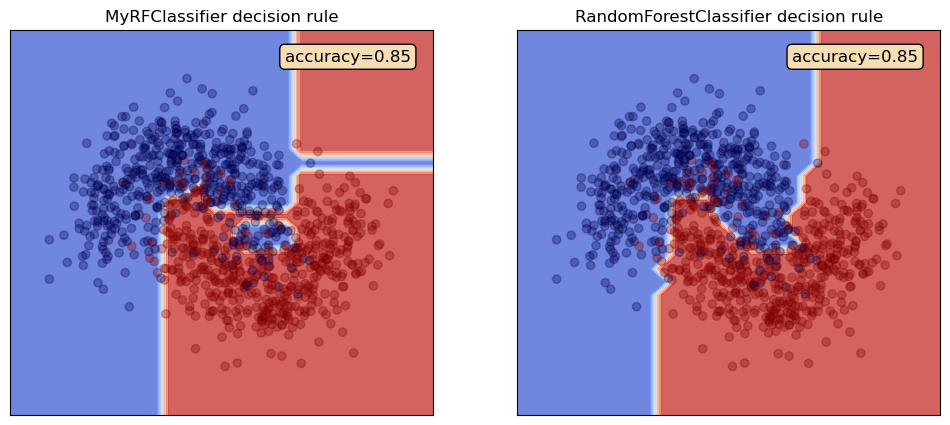

In [5]:
from my_models.random_forest import MyRFClassifier
from sklearn.ensemble import RandomForestClassifier

data = np.hstack((X_train, y_train.reshape(y_train.shape[0], 1)))

n_estimators = 50
my_rf = MyRFClassifier(n_estimators=n_estimators)
my_rf.fit(data)

rf_sklearn = RandomForestClassifier(n_estimators=n_estimators)
rf_sklearn.fit(X_train, y_train)

compare_classifiers([my_rf, rf_sklearn], X_test, y_test, xx, yy, X, y)

## AdaptiveBoosting

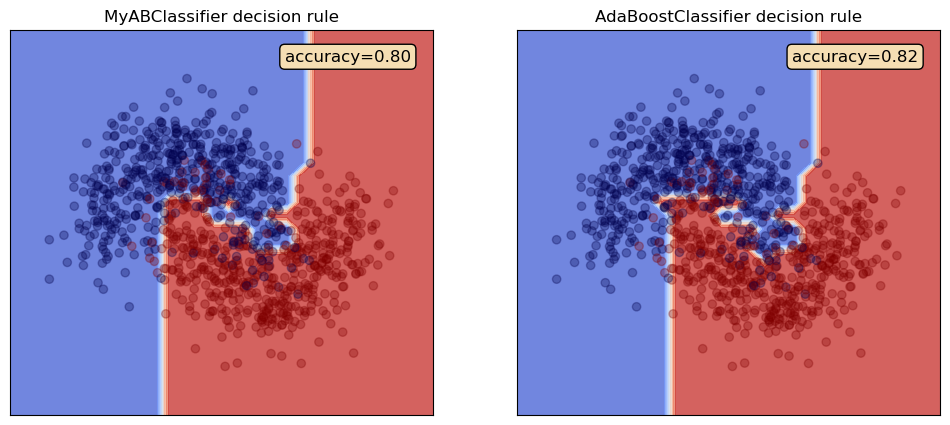

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier 
from my_models.boosting_machines.adaptive_boosting import MyABClassifier

max_depth = 5
n_estimators = 100

my_ada_boost = MyABClassifier(n_estimators=n_estimators, 
                              base_clf=DecisionTreeClassifier,
                              max_depth=max_depth)
my_ada_boost.fit(X_train, y_train)

ada_boost_sklearn = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=max_depth),
    algorithm="SAMME",
    n_estimators=n_estimators
    )
ada_boost_sklearn.fit(X_train, y_train)

compare_classifiers([my_ada_boost, ada_boost_sklearn], 
                    X_test, y_test, xx, yy, X, y)

## GradientBoosting

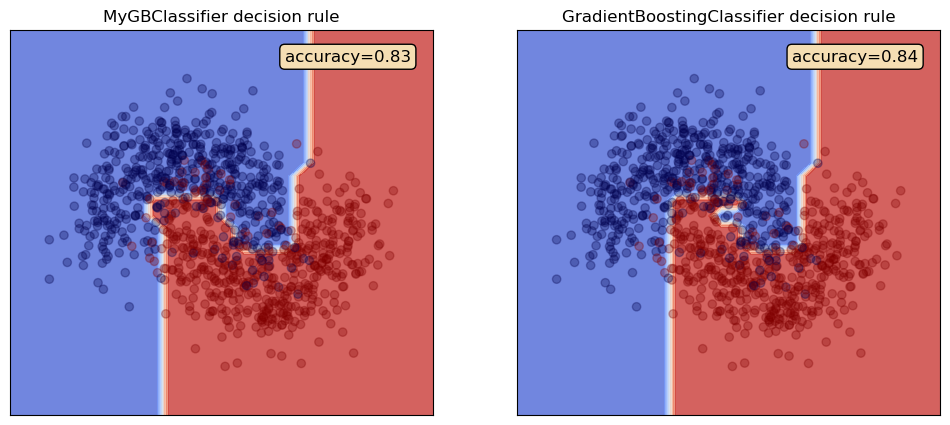

In [7]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from my_models.boosting_machines.gradient_boosting import MyGBClassifier

max_depth = 5
n_estimators = 100
learning_rate = 0.1

my_gradient_boost = MyGBClassifier(max_depth=max_depth)
my_gradient_boost.fit(X_train, y_train, n_estimators=n_estimators, 
              learning_rate=learning_rate)

gradient_boost_sklearn = GradientBoostingClassifier( 
    n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth
    )
gradient_boost_sklearn.fit(X_train, y_train)

compare_classifiers([my_gradient_boost, gradient_boost_sklearn], 
                    X_test, y_test, xx, yy, X, y)

## Support vector machine

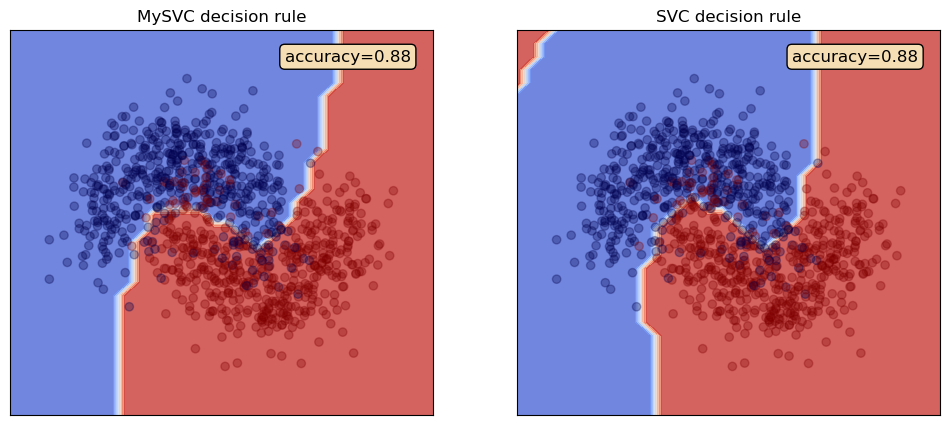

In [8]:
from sklearn.svm import SVC
from my_models.SVM import MySVC

max_iter = 1000
tol = 1e-5
learning_rate = 1e-3

my_svm = MySVC(max_iter=max_iter, tol=tol)
my_svm.fit(X_train, y_train, learning_rate=learning_rate)

svm_sklearn = SVC(max_iter=max_iter, tol=tol)
svm_sklearn.fit(X_train, y_train)

compare_classifiers([my_svm, svm_sklearn], 
                    X_test, y_test, xx, yy, X, y)

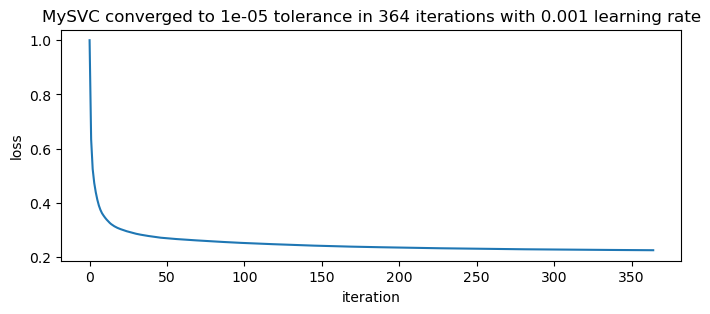

In [9]:
plt.figure(figsize=(8, 3))
plt.plot(my_svm.loss)
plt.title(f'MySVC converged to {tol} tolerance in {my_svm.convergence}\
 iterations with {learning_rate} learning rate')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

# Unsupervised classification

## K-means clusterization

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from my_models.K_means import MyKMeans
n_samples = 1500
n_clusters = 5
X, y = make_blobs(n_samples=n_samples, centers=n_clusters)

my_km = MyKMeans(n_clusters=n_clusters)
my_y_pred = my_km.fit_predict(X)

km_sklearn = KMeans(n_clusters=n_clusters, n_init='auto')
y_pred_sklearn = km_sklearn.fit_predict(X)

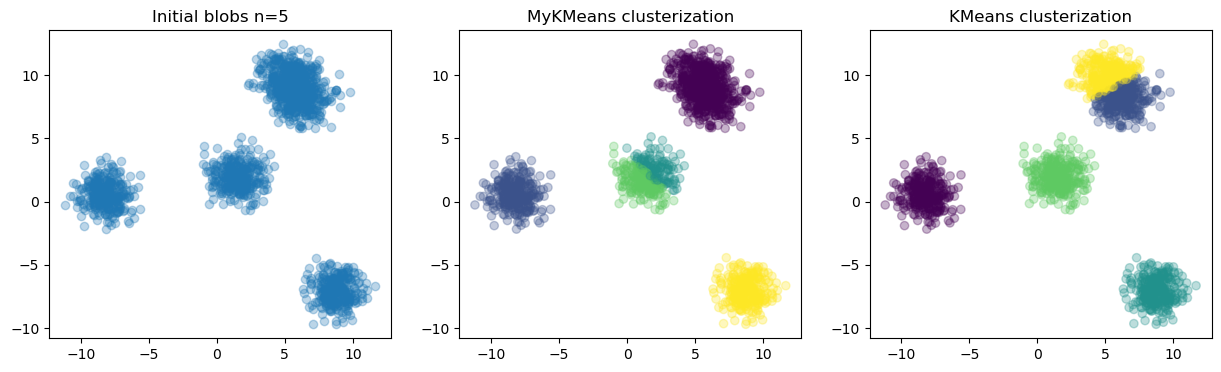

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.3)
ax[0].set_title(f'Initial blobs n={n_clusters}')

ax[1].scatter(X[:, 0], X[:, 1], c=my_y_pred, alpha=0.3)
ax[1].set_title(f'{my_km.__class__.__name__} clusterization')

ax[2].scatter(X[:, 0], X[:, 1], c=y_pred_sklearn, alpha=0.3)
ax[2].set_title(f'{km_sklearn.__class__.__name__} clusterization')
plt.show()